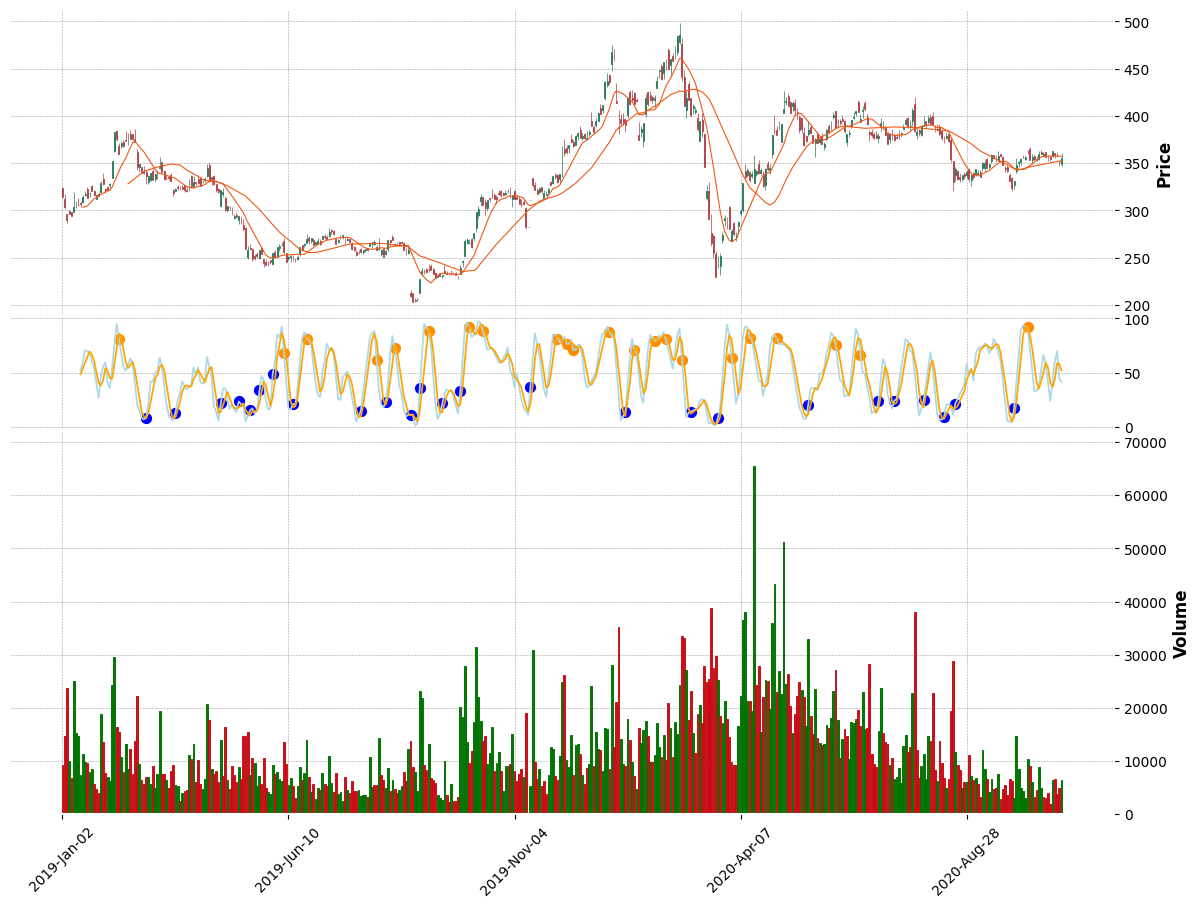

In [3]:
import pandas as pd
import numpy as np
import talib 
from datetime import datetime
import mplfinance as mpf

SData = pd.read_csv('2327 國巨.csv',index_col = 'Date')
SData.index = pd.DatetimeIndex(SData.index)  
SData = SData.loc['1/2/2019' : '10/30/2020']

K, D = talib.STOCH(SData['High'].values,SData['Low'].values,SData['Close'].values)

p_buy = [np.nan] * len(SData)
p_sell = [np.nan] * len(SData)

for i in range(8, len(K)) :
    if K[i - 1] > 80 :
        if (K[i - 1] > D[i - 1]) and (K[i] < D[i]) :
                p_sell[i] = K[i]
    elif K[i - 1] < 20:
        if (K[i - 1] < D[i - 1]) and (K[i] > D[i]):
                p_buy[i] = K[i]

ad = [ mpf.make_addplot(K,color = 'lightblue',panel = 1),
       mpf.make_addplot(D,color = 'orange',panel = 1),
       mpf.make_addplot(p_buy, type = 'scatter', panel = 1, color = 'blue', markersize = 50),
       mpf.make_addplot(p_sell, type = 'scatter', panel = 1, color = 'darkorange', markersize = 50)]

mpf.plot(SData, type = 'candle', mav = [10, 30], volume = True, style = 'charles', figscale = 2, figratio = (4, 3), main_panel = 0,
        volume_panel = 2, addplot = ad,panel_ratios = (4, 1.5, 5))

<function matplotlib.pyplot.show(close=None, block=None)>

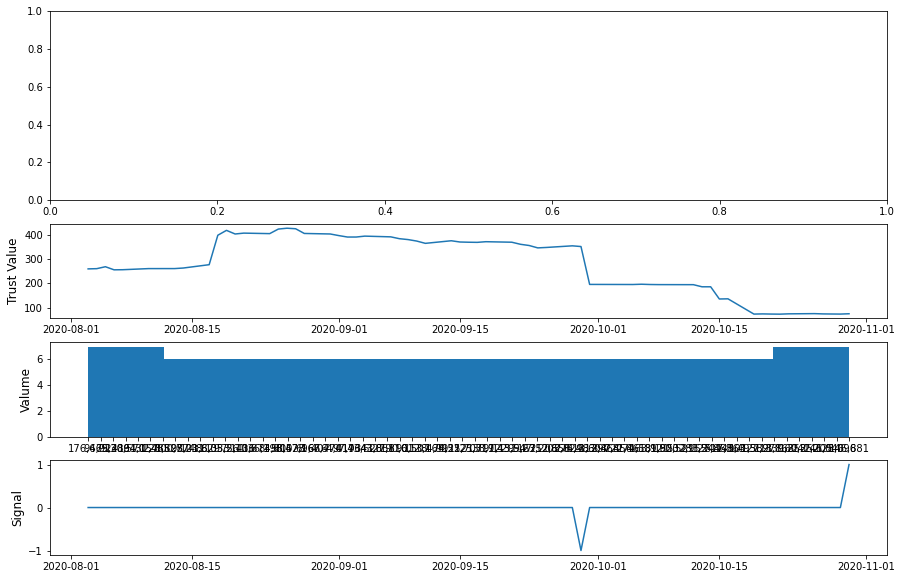

In [1]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import gridspec

SData = pd.read_csv("1722 台肥.csv",index_col = "Date")
SData.index = pd.DatetimeIndex(SData.index)
data_len = len(SData)

#判斷買賣
signal = []
#庫存，只會是 0 or 1
stock = 0
for i in range(len(SData.Trust_Value)):
    if SData.Trust_Value[i] > 300 and stock ==1:
        stock -= 1
        signal.append(-1)
    elif (SData.Trust_Value[i] < 200 or SData.Trust_Value[i] > 1300) and stock == 0:
        stock += 1
        signal.append(1)
    else:
        signal.append(0)
tv_sig = pd.Series(index = SData.index, data = signal)
        
#plot

fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(4, 1,height_ratios = [2,1,1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])

'''
ax2.plot(SData.Trust_Value)
ax3.hist(SData.Volue)
ax4.plot(tv_sig)
'''
'''
add_plots = [
            mpf.make_addplot(tv_sig, type = "line"),
            ]

ax1 = mpf.plot(SData,type="candle",style = 'charles')
'''
ax2.plot(SData.Trust_Value)
ax2.set_ylabel('Trust Value', fontsize = 12) 
ax3.hist(SData.Volume)
ax3.set_ylabel('Valume', fontsize = 12) 
ax4.plot(tv_sig)
ax4.set_ylabel('Signal', fontsize = 12) 
plt.show